In [ ]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# 2. Load dataset
df = pd.read_csv('heart_disease_uci.csv')

In [ ]:
# 3. Bersihkan nama kolom dari spasi tersembunyi
df.columns = df.columns.str.strip()

In [ ]:
# 4. Cek isi data
print("5 data pertama:")
print(df.head())

print("\nInfo dataset:")
print(df.info())

5 data pertama:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal

In [ ]:
# 5. Cek missing values
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah missing value per kolom:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


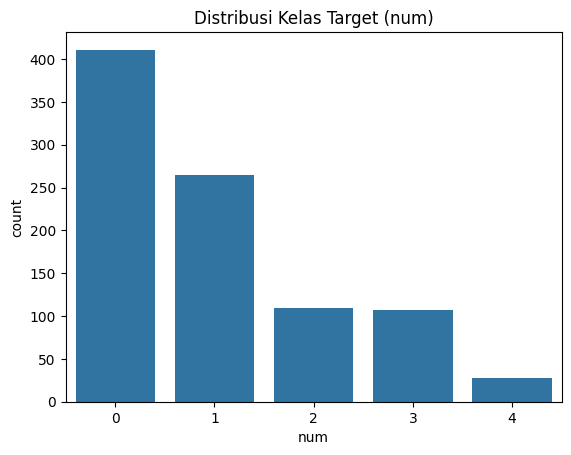

In [ ]:
# 6. Cek distribusi target (kolom: num)
sns.countplot(x='num', data=df)
plt.title("Distribusi Kelas Target (num)")
plt.show()

In [ ]:
# 7. Ubah label jadi biner: 0 = tidak sakit, 1 = sakit
# Karena nilai 'num' di dataset UCI bisa 0–4, kita ubah jadi biner
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# 8. Hapus kolom tidak relevan jika ada
for col in ['id', 'dataset']:
    if col in df.columns:
        df = df.drop(col, axis=1)

In [ ]:
# 9. Ubah kolom kategorikal jadi numerik (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# 10. Pisahkan fitur dan label
X = df.drop('num', axis=1)
y = df['num']

In [ ]:
# 11. Split data training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# 12. Latih model decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 13. Prediksi data test
y_pred = model.predict(X_test)

In [ ]:
# 14. Evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Akurasi:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[60 15]
 [25 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        75
           1       0.85      0.77      0.81       109

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184

Akurasi: 0.782608695652174


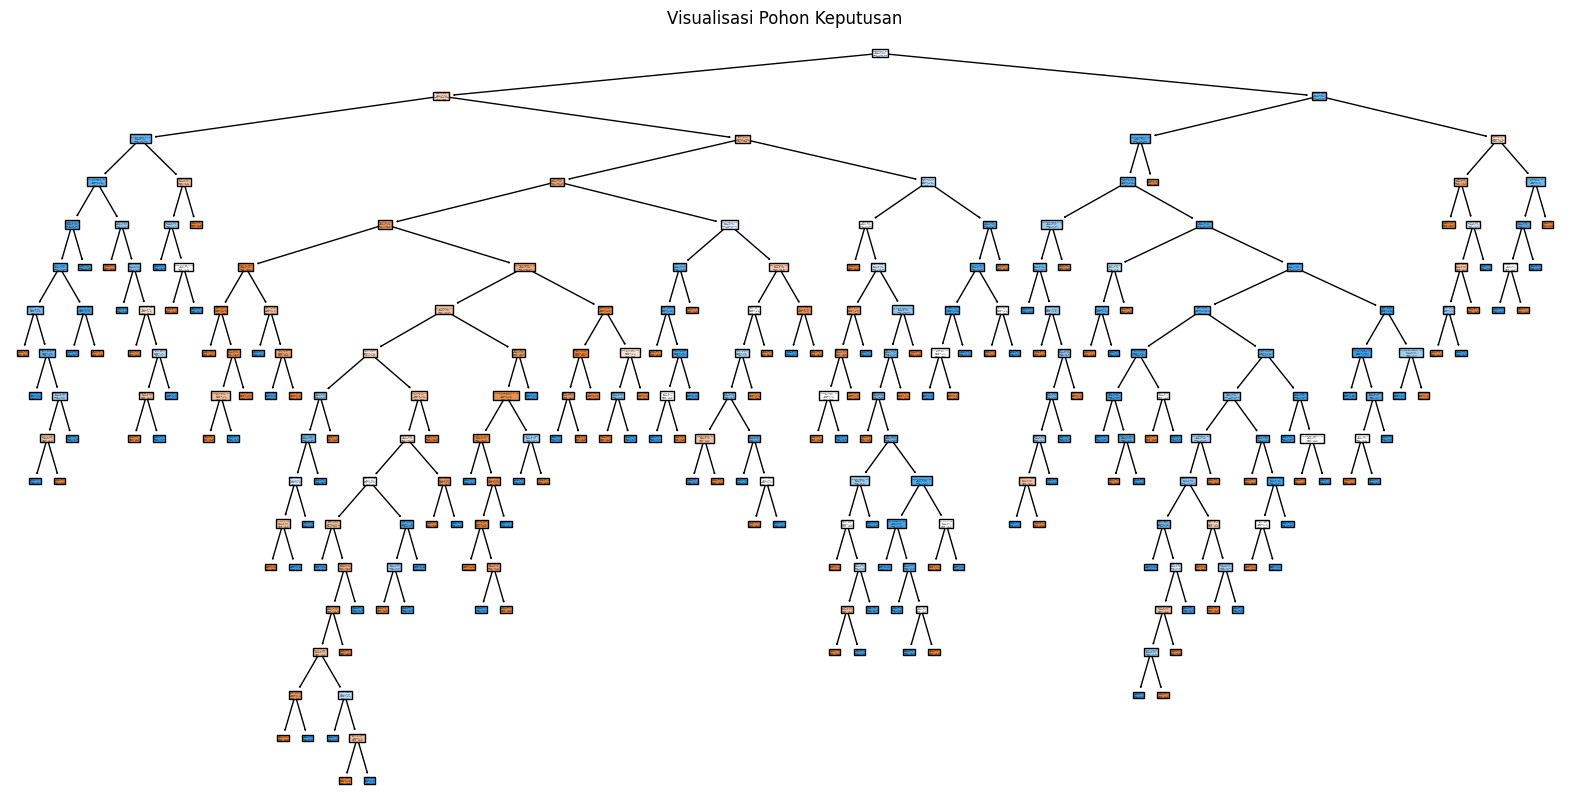

In [ ]:
# 15. Visualisasi Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["Tidak", "Ya"], filled=True)
plt.title("Visualisasi Pohon Keputusan")
plt.show()